In [26]:
import os
os.chdir(os.path.expanduser("~/Downloads/Cargo Ships Using CNN"))  # Change to Downloads folder
print("New Working Directory:", os.getcwd())  # Confirm the change


New Working Directory: /Users/hammazbuksh/Downloads/Cargo Ships Using CNN


🛠 Step 1: Importing Tools
First, we need some tools (libraries) to help us build and train our AI model.
Think of these as the ingredients for our recipe.

✅ Why? These tools will help load, organize, and process images

In [27]:
import os  # Helps us interact with the computer's files
import numpy as np  # Helps with math and large amounts of data
import pandas as pd  # Helps organize data in tables
import matplotlib.pyplot as plt  # Helps create graphs and pictures
from PIL import Image  # Helps work with images
import json  # Helps read files that store a lot of data
from sklearn.model_selection import train_test_split  # Helps split our data into training and testing parts
from sklearn.utils.class_weight import compute_class_weight  # Helps balance ship and no-ship images
from sklearn.metrics import confusion_matrix, classification_report  # Helps evaluate how good our model is
import itertools  # Helps us work with loops and lists

🤖 Step 2: Importing AI & Deep Learning Libraries
Now, we bring in TensorFlow & Keras, which help us build and train our AI.

✅ Why? These tools will help us create, train, and improve our AI.

In [28]:
import tensorflow as tf  # The brain of our AI
from tensorflow.keras.models import Sequential  # Helps us create our AI model step by step
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D  # Different parts (layers) of our AI brain
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Helps make more images from our dataset
from tensorflow.keras.optimizers import Adam  # A smart way for our AI to learn faster
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint  # Helps adjust learning rate and save the best AI model

🖼 Step 3: Loading the Data
Now, we load our images and labels (answers) from a file.

✅ Why? This opens a file that contains all the images and labels.

In [29]:
with open('/Users/hammazbuksh/Downloads/Cargo Ships Using CNN/shipsnet.json') as data_file:
    dataset = json.load(data_file)

In [30]:
with open('/Users/hammazbuksh/Downloads/Cargo Ships Using CNN/shipsnet.json') as data_file:
    dataset = json.load(data_file)
Shipsnet = pd.DataFrame(dataset)
print(Shipsnet.head())  # Show first few rows

                                                data  labels  \
0  [41, 40, 41, 44, 43, 40, 38, 40, 44, 42, 31, 3...       1   
1  [22, 19, 26, 26, 21, 20, 26, 24, 24, 28, 20, 1...       1   
2  [112, 112, 106, 104, 107, 109, 113, 115, 108, ...       1   
3  [72, 76, 73, 72, 73, 74, 75, 73, 74, 73, 73, 7...       1   
4  [63, 58, 58, 63, 65, 66, 70, 66, 59, 67, 71, 6...       1   

                                  locations             scene_ids  
0  [-122.34270462076896, 37.75058641760489]  20170501_180618_1005  
1  [-122.34975593269652, 37.76979644106731]  20170501_181320_0e1f  
2  [-122.34908354683306, 37.74935096766827]  20170609_180756_103a  
3  [-122.32613080820607, 37.73816285249999]  20170721_180825_100b  
4  [-122.3332290637038, 37.721168346437786]  20170702_180943_103c  


Now, let's put it into a table (DataFrame) so we can look at it easily.

✅ Why? This organizes our data into a table format so we can understand it.



🔍 Step 4: Extracting Images & Labels

Now, we separate the images and labels.



In [31]:
x = np.array(dataset['data']).astype('uint8')  # Extract images
y = np.array(dataset['labels']).astype('uint8')  # Extract labels (0 = No Ship, 1 = Ship)

✅ Why?

x contains all the images

y contains the correct answers (ship or no ship)

Now, let's describe the dataset to understand how many images we have.

✅ Why? This counts how many ships and no-ship images we have.

In [32]:
def describeData(a, b):
    print('Total number of images:', len(a))
    print('Number of No-Ship Images:', np.sum(b == 0))
    print('Number of Ship Images:', np.sum(b == 1))
    print('Percentage of positive images: {:.2f}%'.format(100 * np.mean(b)))
    print('Image shape (Width, Height, Channels):', a[0].shape)

describeData(x, y)

Total number of images: 2800
Number of No-Ship Images: 2100
Number of Ship Images: 700
Percentage of positive images: 25.00%
Image shape (Width, Height, Channels): (19200,)


📏 Step 5: Reshaping the Images

We need to reshape our images so that our AI can understand them.

✅ Why?

Reshapes the images into the correct format.

Divides pixel values by 255 (normalizing them).

Turns labels into categories (0 → [1,0] and 1 → [0,1]).

In [33]:
xReshaped = x.reshape([-1, 3, 80, 80]).transpose([0, 2, 3, 1]) / 255.0  # Normalize pixel values
yReshaped = tf.keras.utils.to_categorical(y, num_classes=2)  # Convert labels to categories

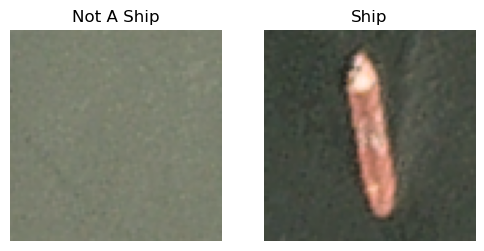

In [34]:
# Separate images into two categories based on labels
imgs0 = xReshaped[y == 0]  # Non-ship images
imgs1 = xReshaped[y == 1]  # Ship images

# Function to plot one sample image from each class
def plotOne(a, b):
    """
    Displays one image from each category: 'Not A Ship' and 'Ship'
    """
    plt.figure(figsize=(6, 3))  # Set figure size

    # Display Non-Ship Image
    plt.subplot(1, 2, 1)  # (rows, columns, index)
    plt.title('Not A Ship')
    plt.imshow(a[100])  # Show the 100th non-ship image
    plt.axis('off')  # Remove axes for better visualization

    # Display Ship Image
    plt.subplot(1, 2, 2)
    plt.title('Ship')
    plt.imshow(b[100])  # Show the 100th ship image
    plt.axis('off')

    plt.show()

# Call the function to display the images
plotOne(imgs0, imgs1)

✂️ Step 6: Splitting the Data

We need to split the images into training and testing sets.

✅ Why?

80% of images will be used to train the AI.

20% of images will be used to test how well it learned.


In [35]:
x_train, x_test, y_train, y_test = train_test_split(xReshaped, yReshaped, test_size=0.2, random_state=123, shuffle=True)


⚖️ Step 7: Balancing the Data

If we have too many "No Ship" images, the AI might ignore "Ship" images.

So, we calculate class weights to balance them.

✅ Why?

This makes the AI treat both "Ship" and "No Ship" images fairly.

In [36]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))

🧠 Step 8: Building the AI Model

We create an AI brain that can analyze images.

✅ Why? This creates and configures our AI model.

In [37]:
def create_model():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(80, 80, 3)),  # Detects patterns in images
        Conv2D(64, (3, 3), activation='relu'),  # More patterns
        MaxPooling2D(pool_size=(2, 2)),  # Reduces image size
        Dropout(0.25),  # Prevents overfitting
        Flatten(),  # Flattens image into 1D
        Dense(128, activation='relu'),  # Fully connected layer
        Dropout(0.5),  # More dropout
        Dense(2, activation='softmax')  # Final layer (2 categories: Ship or No Ship)
    ])

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),  # AI learning speed
                  metrics=['accuracy'])

    return model

model = create_model()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🖼 Step 9: Image Augmentation

This creates new images by slightly changing the original ones.

✅ Why? This helps the AI learn better by adding variety.



In [38]:
datagen = ImageDataGenerator(
    rotation_range=10,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True  
)

📉 Step 10: Training the Model

We now train the AI to recognize ships.

✅ Why?

Trains for 20 rounds (epochs).

Uses class weights to balance data.

Saves the best version of the AI.

In [39]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=int(len(x_train) / 32),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    class_weight=class_weights_dict,
                    callbacks=[ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1, min_lr=0.0001),
                               ModelCheckpoint('model.h5', save_best_only=True)])  # Fixed path

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.6939 - loss: 0.9626

70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 212ms/step - accuracy: 0.6950 - loss: 0.9580 - val_accuracy: 0.7589 - val_loss: 0.4852 - learning_rate: 0.0010
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.8357 - loss: 0.3626

70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.8359 - loss: 0.3623 - val_accuracy: 0.8839 - val_loss: 0.2903 - learning_rate: 0.0010
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8394 - loss: 0.3688

70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.8394 - loss: 0.3686 - val_accuracy: 0.8857 - val_loss: 0.2348 - learning_rate: 0.0010
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - accuracy: 0.8615 - loss: 0.3139 - val_accuracy: 0.8500 - val_loss: 0.3757 - learning_rate: 0.0010
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.8354 - loss: 0.3702 - val_accuracy: 0.8929 - val_loss: 0.2672 - learning_rate: 0.0010
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.8754 - loss: 0.2721 - val_accuracy: 0.8714 - val_loss: 0.3164 - learning_rate: 0.0010
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.8743 - loss: 0.2991

70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 159ms/step - accuracy: 0.8744 - loss: 0.2989 - val_accuracy: 0.9161 - val_loss: 0.2290 - learning_rate: 0.0010
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 0.8938 - loss: 0.2585 - val_accuracy: 0.9071 - val_loss: 0.2509 - learning_rate: 0.0010
Epoch 9/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.8797 - loss: 0.2993 - val_accuracy: 0.8786 - val_loss: 0.2915 - learning_rate: 0.0010
Epoch 10/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8923 - loss: 0.2576
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.8923 - loss: 0.2577 - val_accuracy: 0.9018 - val_loss: 0.2432 - learning_rate: 0.0010
Epoch 11/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.8884 - loss: 0.2528

70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.8886 - loss: 0.2527 - val_accuracy: 0.9304 - val_loss: 0.2030 - learning_rate: 5.0000e-04
Epoch 12/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.9174 - loss: 0.2040

70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.9175 - loss: 0.2040 - val_accuracy: 0.9375 - val_loss: 0.1877 - learning_rate: 5.0000e-04
Epoch 13/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9158 - loss: 0.1898

70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - accuracy: 0.9157 - loss: 0.1901 - val_accuracy: 0.9321 - val_loss: 0.1677 - learning_rate: 5.0000e-04
Epoch 14/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9154 - loss: 0.1798

70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.9155 - loss: 0.1798 - val_accuracy: 0.9429 - val_loss: 0.1315 - learning_rate: 5.0000e-04
Epoch 15/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 185ms/step - accuracy: 0.9241 - loss: 0.1826 - val_accuracy: 0.9232 - val_loss: 0.1699 - learning_rate: 5.0000e-04
Epoch 16/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.9167 - loss: 0.1908 - val_accuracy: 0.9161 - val_loss: 0.1819 - learning_rate: 5.0000e-04
Epoch 17/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.9073 - loss: 0.2128
Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - accuracy: 0.9073 - loss: 0.2127 - val_accuracy: 0.9411 - val_loss: 0.1366 - learning_rate: 5.0000e-04
Epoch 18/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9289 - loss: 0.1655

70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - accuracy: 0.9289 - loss: 0.1654 - val_accuracy: 0.9482 - val_loss: 0.1304 - learning_rate: 2.5000e-04
Epoch 19/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9438 - loss: 0.1426

70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.9437 - loss: 0.1427 - val_accuracy: 0.9464 - val_loss: 0.1207 - learning_rate: 2.5000e-04
Epoch 20/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 168ms/step - accuracy: 0.9317 - loss: 0.1643 - val_accuracy: 0.9429 - val_loss: 0.1532 - learning_rate: 2.5000e-04


📊 Step 11: Evaluating the Model

Now, we test how well the AI performs.

✅ Why? This checks how good our AI is at recognizing ships.

In [40]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\nModel Accuracy:', score[1])

# Make predictions
y_pred = model.predict(x_test)

# Convert predictions from probabilities to class labels (0 or 1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels (one-hot encoded) back to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Now, create the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Define class labels
map_characters = {0: "No Ship", 1: "Ship"}  # Class labels



Model Accuracy: 0.9428571462631226
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


🚀 Step 12: Display Results

Now, we plot graphs and the confusion matrix to visualize results

✅ Why? This shows us if our AI is learning well.

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

print("✅ `plot_confusion_matrix()` function is now defined!")

✅ `plot_confusion_matrix()` function is now defined!


In [42]:
def plot_learning_curves(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

print("✅ `plot_learning_curves()` function is now defined!")

✅ `plot_learning_curves()` function is now defined!


In [43]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

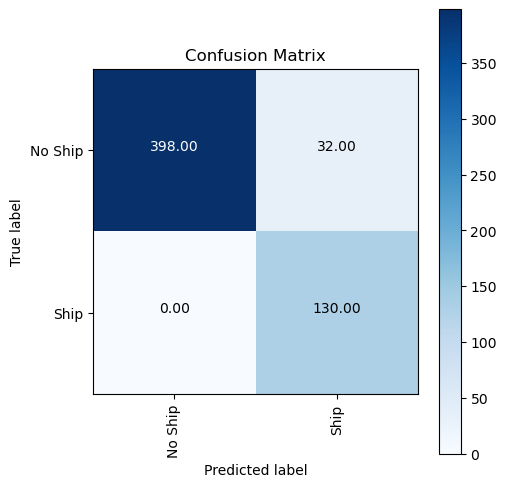

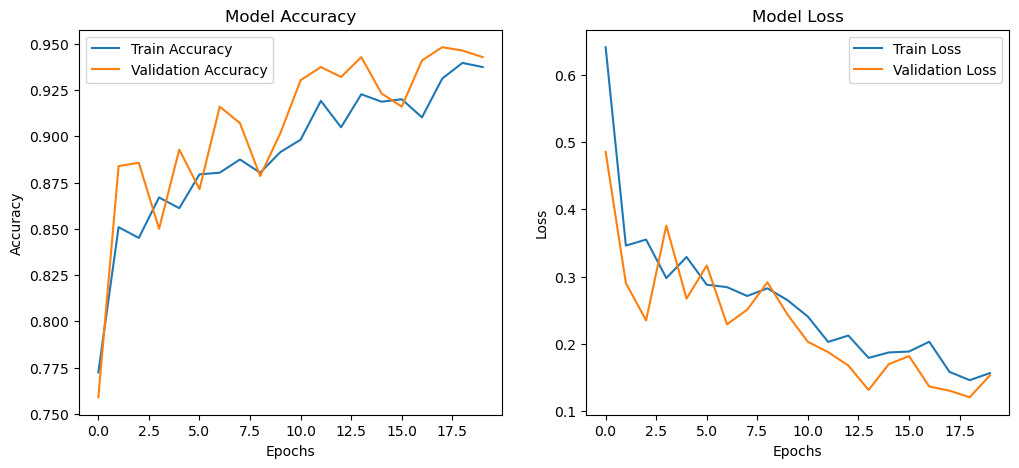

In [44]:
plot_confusion_matrix(confusion_mtx, classes=list(map_characters.values()))
plot_learning_curves(history)